<a href="https://colab.research.google.com/github/lavanyamurudkar28/Datascience/blob/main/Vinequality5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("winequalityN.csv")

#Preparing X and Y

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']
#print(X)
#print(Y)

# Feature Selection 1
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)
'''
'''
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()
'''

#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


'''
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)
'''
'''
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

'''


#Categorical to Numerical
'''
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

'''

#Dealing with missing values

'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()
print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
'''


#Oversampling and Under Sampling

'''
#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))
'''

'''
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

'''
'''
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()
'''


#Dealing with Outliers using Interquantile Range
'''
print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)
out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])
'''

'''
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))
'''

"\n#Principal Component Analysis\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nlogr=LogisticRegression()\npca=PCA(n_components=2)\n\nX = df.drop('Id', axis=1)\nX = X.drop('Species', axis=1)\nY = df['Species']\n\npca.fit(X)\nX=pca.transform(X)\n\nprint(X)\nX_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)\n\nlogr.fit(X_train,y_train)\n\ny_pred=logr.predict(X_test)\nprint(accuracy_score(y_test,y_pred))\n"

In [3]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

# Handle missing values (replace with mean for numerical columns)
X = X.fillna(X.mean())

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)


                   Specs        Score
0          fixed acidity    11.133107
1       volatile acidity    42.573553
2            citric acid     3.690176
3         residual sugar   224.945652
4              chlorides     6.388241
5    free sulfur dioxide   913.332832
6   total sulfur dioxide  1269.974108
7                density     0.006600
8                     pH     0.096622
9              sulphates     1.090422
10               alcohol   201.369195


[0.07953642 0.10130284 0.08199222 0.08439561 0.08339603 0.08498215
 0.08649272 0.09109266 0.08164488 0.0861655  0.13899896]


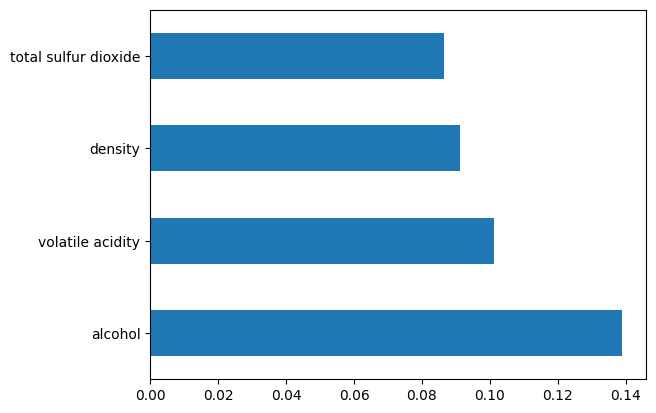

In [4]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()


In [5]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder

# Convert 'type' column to numerical using LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Now you can apply pd.cut on the numerical 'type_encoded' column
df['type_encoded_bins'] = pd.cut(df['type_encoded'], 3, labels=['0', '1', '2'])

# For numerical columns, apply pd.cut directly
df['fixed acidity'] = pd.cut(df['fixed acidity'], 3, labels=['0', '1', '2'])
df['volatile acidity'] = pd.cut(df['volatile acidity'], 3, labels=['0', '1', '2'])
df['citric acid'] = pd.cut(df['citric acid'], 3, labels=['0', '1', '2'])

print(df)

       type fixed acidity volatile acidity citric acid  residual sugar  \
0     white             0                0           0            20.7   
1     white             0                0           0             1.6   
2     white             1                0           0             6.9   
3     white             0                0           0             8.5   
4     white             0                0           0             8.5   
...     ...           ...              ...         ...             ...   
6492    red             0                1           0             2.0   
6493    red             0                0           0             2.2   
6494    red             0                0           0             2.3   
6495    red             0                1           0             2.0   
6496    red             0                0           0             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45

In [6]:
#Categorical to Numerical

le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)


In [7]:
#Dealing with missing values

print(df.isnull().sum())

# Check if 'Item_Weight' exists in the DataFrame, correct the name if needed
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True) #Imputing Numerical Values
else:
    print("Column 'Item_Weight' not found in the DataFrame. Please check the column name.")

# Similarly, check for 'Outlet_Size'
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
else:
    print("Column 'Outlet_Size' not found in the DataFrame. Please check the column name.")

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_encoded             0
type_encoded_bins        0
dtype: int64
Column 'Item_Weight' not found in the DataFrame. Please check the column name.
Column 'Outlet_Size' not found in the DataFrame. Please check the column name.


Counter({3: 2836, 2: 2138, 4: 1079, 1: 216, 5: 193, 0: 30, 6: 5})
Counter({3: 2836, 2: 2836, 4: 2836, 5: 2836, 1: 2836, 0: 2836, 6: 2836})


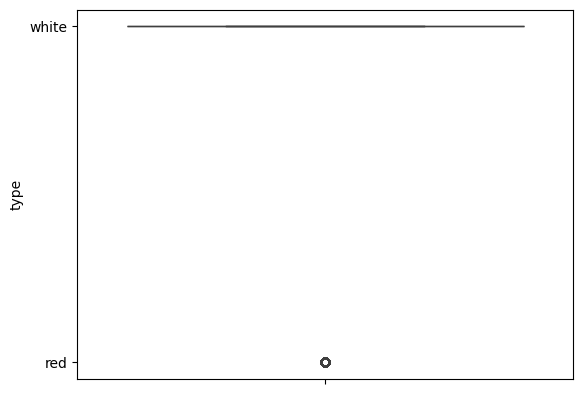

In [8]:
#Oversampling and Under Sampling

#a = (df['quality'] == 'winequalityN').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))



from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)



#Identifying Outliers by ploting
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['type'])
plt.show()


In [9]:
#Dealing with Outliers using Interquantile Range

# Convert 'type' column to numerical using LabelEncoder if it's not already
if df['type'].dtype == object:  # Check if 'type' column is of object (string) type
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])

    # Now calculate quantiles on the numerical 'type_encoded' column
    Q1 = df['type_encoded'].quantile(0.25)
    Q3 = df['type_encoded'].quantile(0.75)
else:
    Q1 = df['type'].quantile(0.25)
    Q3 = df['type'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)
# Use the numerical 'type_encoded' column for outlier handling if it was created
if 'type_encoded' in df.columns:
    out1=df[df['type_encoded'] < lower].values
    out2=df[df['type_encoded'] > upper].values

    df['type_encoded'].replace(out1,lower,inplace=True)
    df['type_encoded'].replace(out2,upper,inplace=True)

    print(df['type_encoded'])
else:
    out1=df[df['type'] < lower].values
    out2=df[df['type'] > upper].values

    df['type'].replace(out1,lower,inplace=True)
    df['type'].replace(out2,upper,inplace=True)

    print(df['type'])

0.0
1.0
1.0
0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type_encoded, Length: 6497, dtype: int64


In [10]:
#Clustering

#from sklearn.datasets import load_winequalityN  #This function does not exist
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
#irs=load_iris() # This loads the iris dataset, use load_wine instead
wine_data = load_wine()
x=wine_data.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.25673469e+01 2.58020408e+00 2.30265306e+00 2.10816327e+01
  9.36530612e+01 2.00408163e+00 1.61836735e+00 4.00612245e-01
  1.43265306e+00 4.10775508e+00 9.33877551e-01 2.46204082e+00
  4.66122449e+02]
 [1.37658824e+01 1.88647059e+00 2.40294118e+00 1.68058824e+01
  1.04117647e+02 2.86705882e+00 3.03470588e+00 2.80588235e-01
  1.95500000e+00 5.67205882e+00 1.08323529e+00 3.13470588e+00
  1.18785294e+03]
 [1.29016000e+01 2.54860000e+00 2.40160000e+00 1.98140000e+01
  1.04640000e+02 2.10220000e+00 1.55580000e+00 3.84800000e-01
  1.54780000e+00 5.71820000e+00 8.68120000e-01 2.33440000e+00
  7.29960000e+02]]
[1 0 0 1 0 0 1 0 0 0 2 0 1 2 2 0 1 1 0 1 0 1 2 2 2 0 0 0 2 2 1 1 0 1 1 2 2
 0 0 2 2 1 0 0 0]


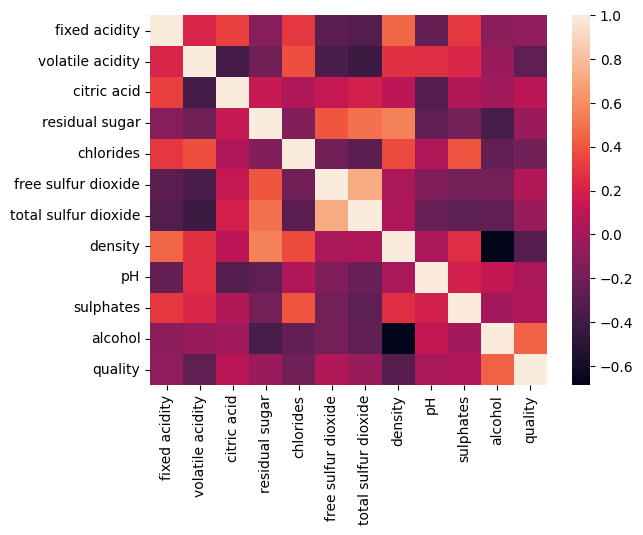

In [11]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("winequalityN.csv")


#Preparing X and Y

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']



'''
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["type"], df["fixed acidity"])
plt.title("Scatter Plot")
plt.xlabel("type")
plt.ylabel("fixed acidity")
plt.show()
'''

'''
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()
'''

'''
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(df["Species"], df["PetalLengthCm"])
plt.title("Bar Plot")
plt.show()
'''

'''
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()
'''

'''
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data = df)
plt.title("Count Plot for Species")
plt.show()
'''

'''
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='SepalLengthCm', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()
'''


#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr())
plt.show()

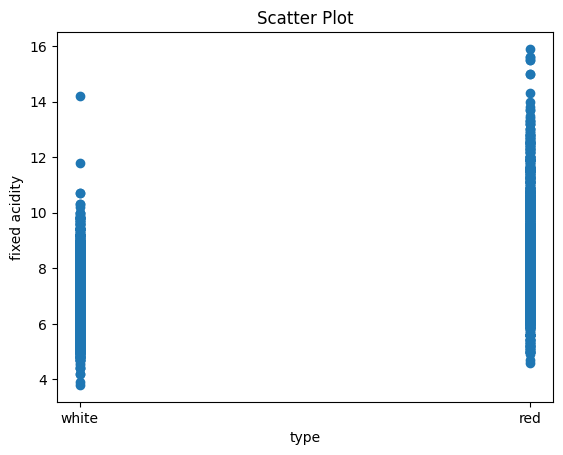

In [12]:
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["type"], df["fixed acidity"])
plt.title("Scatter Plot")
plt.xlabel("type")
plt.ylabel("fixed acidity")
plt.show()


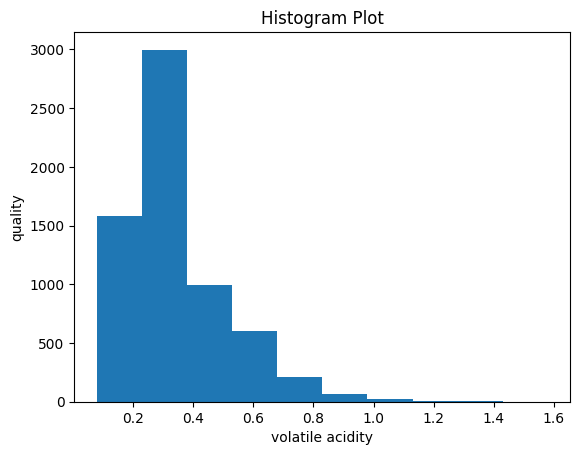

In [13]:
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["volatile acidity"])
plt.title("Histogram Plot")
plt.xlabel("volatile acidity")
plt.ylabel("quality")
plt.show()

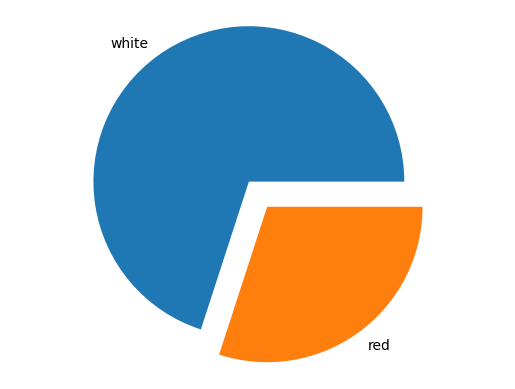

In [14]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["white", "red"]
sizes = [70, 30]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1))
plt.axis('equal')
plt.show()

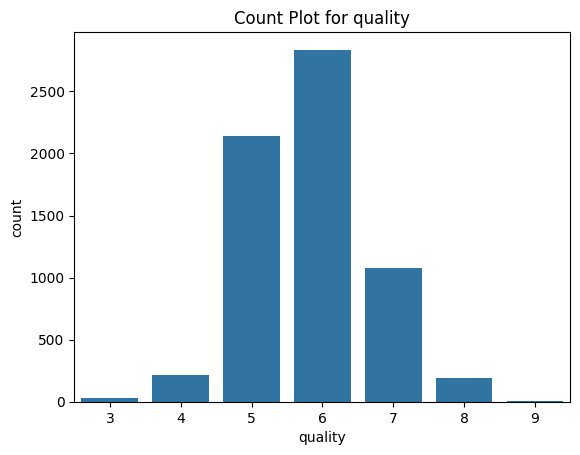

In [15]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='quality', data = df)
plt.title("Count Plot for quality")
plt.show()


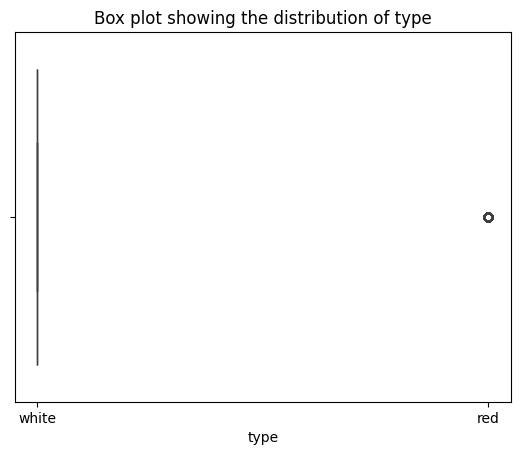

In [16]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='type', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of type")
plt.show()